# Live Coding Session 3:
What you will learn in this session:
 * Datatypes 
     * *string*
     * *list*
     * *set*
 * Control structures
 * Accessing live data from the web (RSS Newsfeed)
 * Python list comprehension
 * Write to text-file
 * Date and time


## Task description

Before implementing solutions for this task study the section on *strings* in the [notebook on sequential data types](03aDataTypesSequential.ipynb).

1. Run the code cell below. The code accesses and prints the current RSS Feed of [Zeit Online](http://www.zeit.de/index). However, the printed output not only contains raw-text but HTML-Markup for references. Modify the code such that only the raw-text of title and description is printed, without any references and markup elements. All of these raw-texts shall be stored in a list of strings.
2. Modify the code such that the number of words per feed entry (text+description) is printed.
3. Modify the code such that for each feed-entry a list of all word is generated. The words in this list shall all be represented with only lower-case letters. Moreover, the words shall not contain punctuation marks at the end. All of these word-lists shall be stored in a list of lists.

In [2]:
!pip install feedparser

    100% |████████████████████████████████| 194kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for feedparser ... done
  Stored in directory: /Users/johannes/Library/Caches/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
Successfully built feedparser


In [3]:
# Access RSS Feed of Zeit.de
import feedparser
feed='http://newsfeed.zeit.de/index'
f=feedparser.parse(feed)
for e in f.entries:
  print('\n---------------------------')
  text=e.title+"\n"+e.description
  print(text)


---------------------------
11. Januar 2019: Datenschutz für tausend Euro
<a href="https://www.zeit.de/politik/2019-01/nachrichtenpodcast-was-jetzt-11-01-2019"><img style="float:left; margin-right:5px" src="https://img.zeit.de/politik/2017-09/illu-podcast-news/wide__148x84"></a> Mit seinem iPhone präsentiert sich Apple als großer Datenschützer. Zu Recht? Im Podcast sprechen wir außerdem über Deutschlands Chancen bei der Handball-WM.

---------------------------
US-Haushaltsstreit: Trump könnte Armeemittel für Mauerbau einsetzen
<a href="https://www.zeit.de/politik/ausland/2019-01/us-haushaltsstreit-donald-trump-grenzmauer-mexiko"><img style="float:left; margin-right:5px" src="https://img.zeit.de/politik/ausland/2019-01/us-haushaltsstreit-donald-trump2/wide__148x84"></a> Donald Trump wirbt an der Grenze für seine Mauerpläne und droht weiter mit dem nationalen Notstand. Offenbar prüft die Regierung, Geld aus einem Armeefonds abzuzweigen.

---------------------------
Vergewaltigungsvorwü

In [4]:
# Access RSS Feed of Zeit.de
import feedparser
import time
feed='http://newsfeed.zeit.de/index'
f=feedparser.parse(feed)
newstexts=[]
newslists=[]
for e in f.entries:
  print('\n---------------------------')
  endMarkup=e.description.find('</a>') 
  rawDescription=e.description[endMarkup+5:]  
  text=e.title+"\n"+rawDescription
  newstexts.append(text+"\n")  
  textList=text.split()
  print(text)
  textList=[s.strip('.,:!?\"').lower() for s in textList]#list comprehension
  print(textList)
  newslists.append(textList)
  print("Number of words in this article: ",len(textList))
print("Number of article, currently in this feed: ",len(newslists))


---------------------------
11. Januar 2019: Datenschutz für tausend Euro
Mit seinem iPhone präsentiert sich Apple als großer Datenschützer. Zu Recht? Im Podcast sprechen wir außerdem über Deutschlands Chancen bei der Handball-WM.
['11', 'januar', '2019', 'datenschutz', 'für', 'tausend', 'euro', 'mit', 'seinem', 'iphone', 'präsentiert', 'sich', 'apple', 'als', 'großer', 'datenschützer', 'zu', 'recht', 'im', 'podcast', 'sprechen', 'wir', 'außerdem', 'über', 'deutschlands', 'chancen', 'bei', 'der', 'handball-wm']
Number of words in this article:  29

---------------------------
US-Haushaltsstreit: Trump könnte Armeemittel für Mauerbau einsetzen
Donald Trump wirbt an der Grenze für seine Mauerpläne und droht weiter mit dem nationalen Notstand. Offenbar prüft die Regierung, Geld aus einem Armeefonds abzuzweigen.
['us-haushaltsstreit', 'trump', 'könnte', 'armeemittel', 'für', 'mauerbau', 'einsetzen', 'donald', 'trump', 'wirbt', 'an', 'der', 'grenze', 'für', 'seine', 'mauerpläne', 'und', 'd

**Tasks:**

1. Write the lists of raw-texts into a .txt-file, which contains the word `rawtexts` and the current date and time.
2. Write the lists of wordlists into a .txt-file, which contains the word `wordlists` and the current date and time.

In [5]:
today=time.strftime("%d-%m-%Y")
now=time.strftime("%H-%M-%S")
print(today)
print(now)
print(newslists)
print(type(newslists))
with open("rawtexts"+today+'-'+now+".txt","w") as f:
    for w in newstexts:
        f.write(w+'\n')

11-01-2019
07-08-09
[['11', 'januar', '2019', 'datenschutz', 'für', 'tausend', 'euro', 'mit', 'seinem', 'iphone', 'präsentiert', 'sich', 'apple', 'als', 'großer', 'datenschützer', 'zu', 'recht', 'im', 'podcast', 'sprechen', 'wir', 'außerdem', 'über', 'deutschlands', 'chancen', 'bei', 'der', 'handball-wm'], ['us-haushaltsstreit', 'trump', 'könnte', 'armeemittel', 'für', 'mauerbau', 'einsetzen', 'donald', 'trump', 'wirbt', 'an', 'der', 'grenze', 'für', 'seine', 'mauerpläne', 'und', 'droht', 'weiter', 'mit', 'dem', 'nationalen', 'notstand', 'offenbar', 'prüft', 'die', 'regierung', 'geld', 'aus', 'einem', 'armeefonds', 'abzuzweigen'], ['vergewaltigungsvorwürfe', 'us-polizei', 'fordert', 'dna-probe', 'von', 'cristiano', 'ronaldo', 'an', 'eine', 'amerikanerin', 'wirft', 'dem', 'juventus-turin-star', 'vergewaltigung', 'vor', 'nun', 'bitten', 'us-ermittler', 'die', 'behörden', 'in', 'italien', 'um', 'unterstützung', 'ronaldo', 'soll', 'eine', 'dna-probe', 'abgeben'], ['fleischkonsum', 'viele',

In [6]:
with open("wordlists"+today+'-'+now+".txt","w") as f:
    for entry in newslists:
        for w in entry:
            f.write(w+", ")
        f.write("\n\n")

**Task:**
1. Determine the vocabulary of the current feed-texts. The vocabulary is the set of all words, which occure at least once in the feed-texts. 
2. How many words are in the vocabulary? 
3. Sort the vocabulary in lexical order.

In [7]:
listofallwords=[w for text in newslists for w in text]
vocab=set(listofallwords)
print("Number of distinct words in the vocabulary: ",len(vocab))
vocabList=list(vocab)
vocabList.sort()
print(vocabList)

Number of distinct words in the vocabulary:  311
['', '11', '120', '17', '20', '2010', '2019', 'ab', 'abgeben', 'ablehnen', 'abzufangen', 'abzuzweigen', 'afd', 'afghanistan', 'akt', 'alle', 'allergiker', 'als', 'amerikanerin', 'amtszeit', 'an', 'andré', 'angewiesen', 'anleihen', 'apple', 'armeefonds', 'armeemittel', 'asylbescheide', 'asylverfahren', 'auch', 'auf', 'aufnehmen', 'aufräummethoden', 'aus', 'aussage', 'aussagen', 'außerdem', 'bakterien', 'beginn', 'behörden', 'bei', 'belastet', 'bereit', 'bericht', 'besonders', 'besser', 'besseres', 'bitten', 'blamierte', 'bundesamt', 'bundeskanzlerin', 'bundesvorstand', 'chancen', 'cohen', 'cristiano', 'da', 'damit', 'daran', 'das', 'datenschutz', 'datenschützer', 'davos', 'dem', 'demokraten', 'der', 'des', 'deutschen', 'deutschland', 'deutschlands', 'die', 'diesem', 'diktators', 'dna-probe', 'donald', 'droht', 'durch', 'durchfall', 'durchfallerregern', 'ein', 'eine', 'einem', 'einen', 'einer', 'einsetzen', 'einst', 'einzelhandel', 'einzig

In [8]:
listofallwords

['11',
 'januar',
 '2019',
 'datenschutz',
 'für',
 'tausend',
 'euro',
 'mit',
 'seinem',
 'iphone',
 'präsentiert',
 'sich',
 'apple',
 'als',
 'großer',
 'datenschützer',
 'zu',
 'recht',
 'im',
 'podcast',
 'sprechen',
 'wir',
 'außerdem',
 'über',
 'deutschlands',
 'chancen',
 'bei',
 'der',
 'handball-wm',
 'us-haushaltsstreit',
 'trump',
 'könnte',
 'armeemittel',
 'für',
 'mauerbau',
 'einsetzen',
 'donald',
 'trump',
 'wirbt',
 'an',
 'der',
 'grenze',
 'für',
 'seine',
 'mauerpläne',
 'und',
 'droht',
 'weiter',
 'mit',
 'dem',
 'nationalen',
 'notstand',
 'offenbar',
 'prüft',
 'die',
 'regierung',
 'geld',
 'aus',
 'einem',
 'armeefonds',
 'abzuzweigen',
 'vergewaltigungsvorwürfe',
 'us-polizei',
 'fordert',
 'dna-probe',
 'von',
 'cristiano',
 'ronaldo',
 'an',
 'eine',
 'amerikanerin',
 'wirft',
 'dem',
 'juventus-turin-star',
 'vergewaltigung',
 'vor',
 'nun',
 'bitten',
 'us-ermittler',
 'die',
 'behörden',
 'in',
 'italien',
 'um',
 'unterstützung',
 'ronaldo',
 'soll'

In [10]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 1.4MB/s ta 0:00:01


In [11]:
from wordcloud import WordCloud

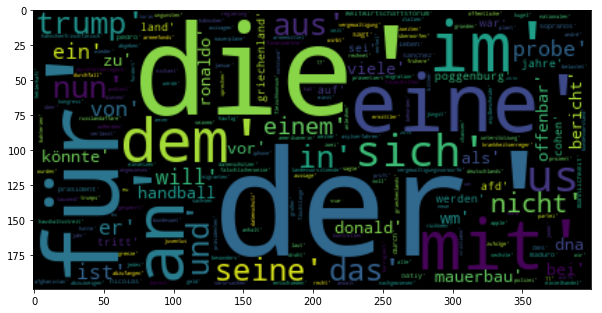

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
wc=WordCloud().generate(str(listofallwords))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")

In [16]:
#!pip install nltk
#nltk.download() #press return after dialog-window for downloading different dataset opens

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
from nltk.corpus import stopwords
stopwordlist=stopwords.words("german")

In [23]:
print(stopwordlist)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euch', 'im'

In [24]:
listofRelevantwords=[w for text in newslists for w in text if w not in stopwordlist]
vocabRelevant=set(listofRelevantwords)
print("Number of distinct words in the vocabulary: ",len(vocabRelevant))
vocabListRelevant=list(vocabRelevant)
vocabListRelevant.sort()
print(vocabListRelevant)

Number of distinct words in the vocabulary:  248
['', '11', '120', '17', '20', '2010', '2019', 'ab', 'abgeben', 'ablehnen', 'abzufangen', 'abzuzweigen', 'afd', 'afghanistan', 'akt', 'allergiker', 'amerikanerin', 'amtszeit', 'andré', 'angewiesen', 'anleihen', 'apple', 'armeefonds', 'armeemittel', 'asylbescheide', 'asylverfahren', 'aufnehmen', 'aufräummethoden', 'aussage', 'aussagen', 'außerdem', 'bakterien', 'beginn', 'behörden', 'belastet', 'bereit', 'bericht', 'besonders', 'besser', 'besseres', 'bitten', 'blamierte', 'bundesamt', 'bundeskanzlerin', 'bundesvorstand', 'chancen', 'cohen', 'cristiano', 'daran', 'datenschutz', 'datenschützer', 'davos', 'demokraten', 'deutschen', 'deutschland', 'deutschlands', 'diktators', 'dna-probe', 'donald', 'droht', 'durchfall', 'durchfallerregern', 'einsetzen', 'einst', 'einzelhandel', 'einzige', 'entschieden', 'erfreuen', 'erkennen', 'erneut', 'eröffnungsspiel', 'eu-finanzhilfen', 'euro', 'ex-anwalt', 'favoritenrolle', 'fehlerhaft', 'fernsehen', 'fig

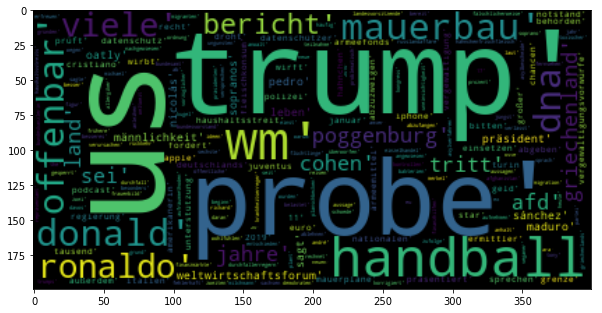

In [25]:
wc=WordCloud().generate(str(listofRelevantwords))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")